In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = "../../experiments/tomography_wchain_1/3/loss_values.csv"
loss_values = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_1/4/loss_values.csv"
loss_values2 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_1/5/loss_values.csv"
loss_values3 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_2/3/loss_values.csv"


plt.plot(loss_values, label = '3 qubits')
plt.plot(loss_values2, label = '4 qubits')
plt.plot(loss_values3, label = '5 qubits')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../experiments/tomography_wchain_1/3/loss_values.csv'

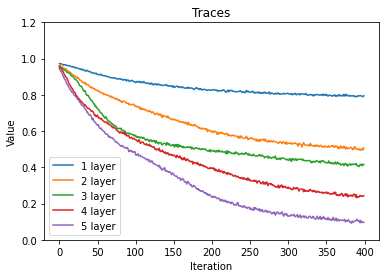

In [5]:
tracess = []

for i in range(1, 6):
    path = "../../experiments/tomography/tomography_wchain_" + str(i) + '/' + str(5) + '/loss_values.csv'
    loss_values = pd.read_csv(path, sep=",", header=None)
    plt.plot(loss_values, label = str(i) + ' layer')

plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.title('Traces')
plt.legend()
plt.show()

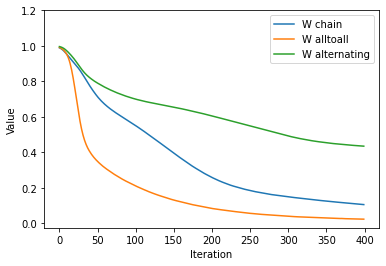

In [2]:
plt.plot(traces1, label = 'W chain')
plt.plot(traces2, label = 'W alltoall')
plt.plot(traces3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

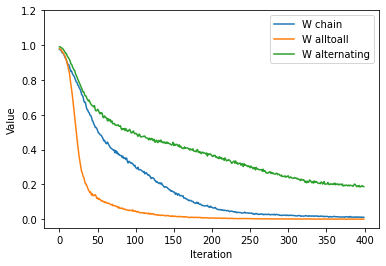

In [3]:
plt.plot(loss_values1, label = 'W chain')
plt.plot(loss_values2, label = 'W alltoall')
plt.plot(loss_values3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()